In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Creating the dataframe

In [2]:
airplane = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

# Taking a look at the non-text values

In [3]:
airplane.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


# Some columns have too much null values
Those columns don't show much practical usage for analysis

In [4]:
airplane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.1+ KB


-------------------------------------------------------------------------------------------------------------------

# Taking a look at the dataframe

In [5]:
airplane.head(10)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


-------------------------------------------------------------------------------------------------------------------

# A Scatter Plot of Fatalities  vs People Aboard
The red scatter plots shows that all people died during that crash

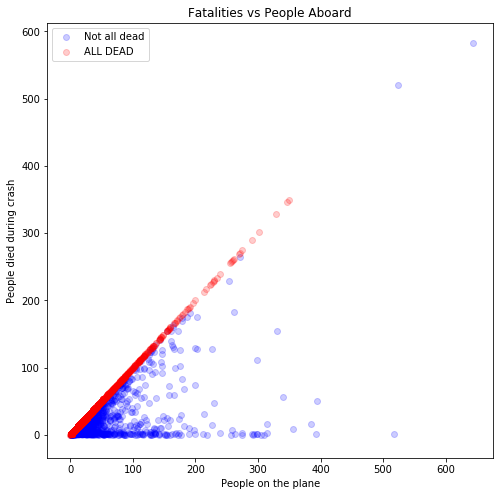

In [6]:
fatalities_array = airplane.loc[:,['Fatalities']].values
aboard_array = airplane.loc[:,['Aboard']].values
all_dead = fatalities_array[:] == aboard_array[:]
airplane['all_dead'] = all_dead


_ = plt.figure(figsize = (8,8))
_ = plt.scatter(aboard_array[all_dead == False], fatalities_array[all_dead == False], color = 'blue',
            alpha=0.2, label = "Not all dead")
_ = plt.scatter(aboard_array[all_dead],fatalities_array[all_dead], color = 'red',alpha=0.2, label = "ALL DEAD")
_ = plt.title("Fatalities vs People Aboard")
_ = plt.xlabel("People on the plane")
_ = plt.ylabel("People died during crash")
_ = plt.legend()

-------------------------------------------------------------------------------------------------------------------

# Histogram of crashes in a year
We see that in initial years there were fewer airplanes so crashes are few, but as time progresses, we see much increase in crashes which peak out around 1970s and remain flat untill 1980. The 1980s were still better but in 1990s the crashes increased again, maybe because of increasing number of flights? So we can conclude that in 1980s the Airplane were safer and the same safety levels continued in 1990s untill we saw much improvement in Airplane safety in 2000s as crashes steeply declined.

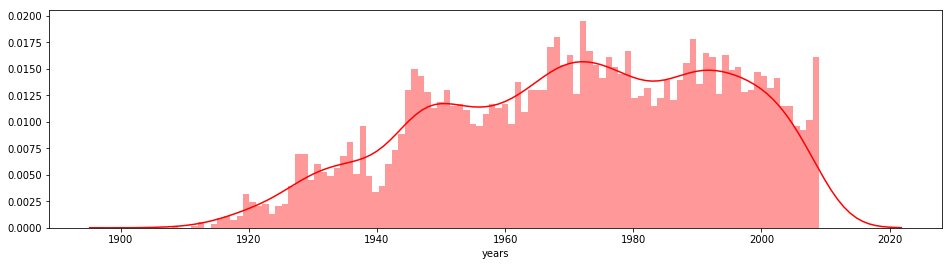

In [7]:
years = airplane['Date'].apply(lambda x: int(x.split('/')[2]))
airplane['years'] = years

plt.figure(figsize = (16,4))
_ = sns.distplot(airplane['years'], bins = 100, color = 'red')

-------------------------------------------------------------------------------------------------------------------

# The crashes in which all people died also reduced in 2000s
This indicates that Airplane build quality had improved significantly and Airplanes are safer during crash than before.

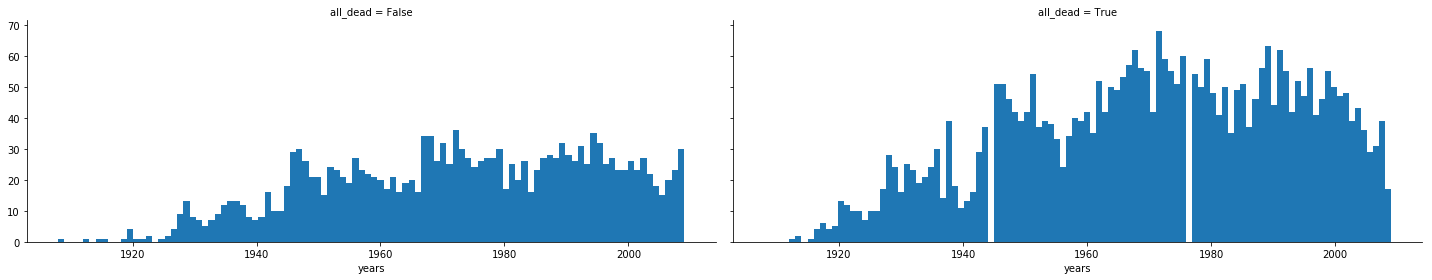

In [8]:
plot = sns.FacetGrid(airplane, col = 'all_dead', aspect = 2.5, height = 4)
_ = plot.map(plt.hist, 'years', bins=100)

-------------------------------------------------------------------------------------------------------------------

# All the people died in majority of the crashes.

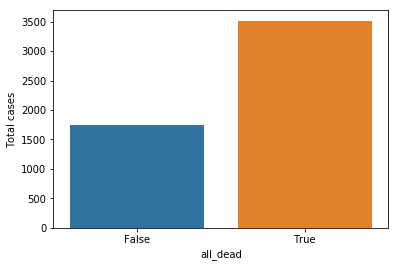

In [9]:
sns.countplot(x = 'all_dead', data = airplane)
_ = plt.ylabel('Total cases')

-------------------------------------------------------------------------------------------------------------------

# Creating Hours column in the dataframe
Extracting out hours from the 'Time' column as float values

In [10]:
hours = []
for i in range(10):
    hours.append("0" + str(i))
for i in range(10,25):
    hours.append(str(i))

airplane['Hours'] = airplane['Time'].apply(lambda x: str(x).split(":")[0])
airplane['Hours'] = airplane['Hours'][airplane['Hours'] != 'nan']
airplane['Hours'] = airplane['Hours'][airplane['Hours'].isin(hours)]
airplane['Hours'] = np.array(airplane['Hours'], dtype=np.float64)


-------------------------------------------------------------------------------------------------------------------

# The winter months have slightly higher number of crashes
As the visibility in winters is low and also Airports are usually snowy and sometimes the runways are wet which makes landing and take off more prone to crash.

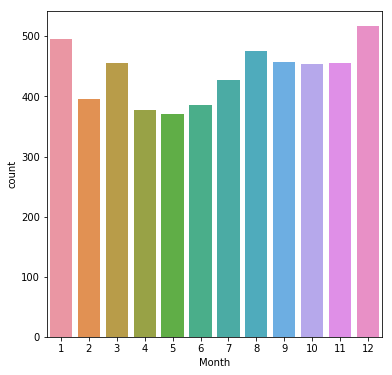

In [11]:
airplane['Month'] = airplane['Date'].apply(lambda x: int(str(x).split('/')[0]))
plt.figure(figsize=(6,6))
_ = sns.countplot(x = 'Month', data = airplane)

-------------------------------------------------------------------------------------------------------------------

# The crashes are maximum from 09:00 to 20:00
09:00 to 20:00 are the peak hours so it looks appropriate. The other hours have lesser crashes due to lesser flights at that time.

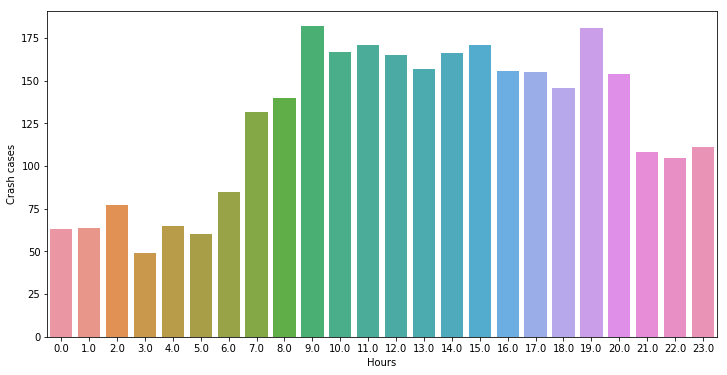

In [12]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Hours', data = airplane)
_ = plt.ylabel('Crash cases')

-------------------------------------------------------------------------------------------------------------------

# Fatalities by countries
The countries with most fatalities are a sign of danger.

In [13]:
#There are 4303 unique location values, we need to refine it into seperate countries
airplane['Location'].describe()

count                  5248
unique                 4303
top       Sao Paulo, Brazil
freq                     15
Name: Location, dtype: object

In [14]:
states = pd.read_csv('states.csv')
states['State'] = states['State'].apply(lambda x: str(x).lower().strip())
airplane['Country'] = airplane['Location'].apply(lambda x: str(x).split(',')[-1].lower().strip())

In [15]:
country_ls = []
for i in airplane['Country']:
    country_ls.append(i)

states_ls = []
for i in states['State']:
    states_ls.append(i)
    
for i,j in enumerate(country_ls):
    if j in states_ls:
        country_ls[i] = 'USA'

In [16]:
airplane['Country'] = country_ls
most_fatal_countries = airplane[['Fatalities','Country']].groupby('Country').agg('sum')
most_fatal_countries = most_fatal_countries[most_fatal_countries['Fatalities'] > 1000]
most_fatal_countries.reset_index(inplace = True)

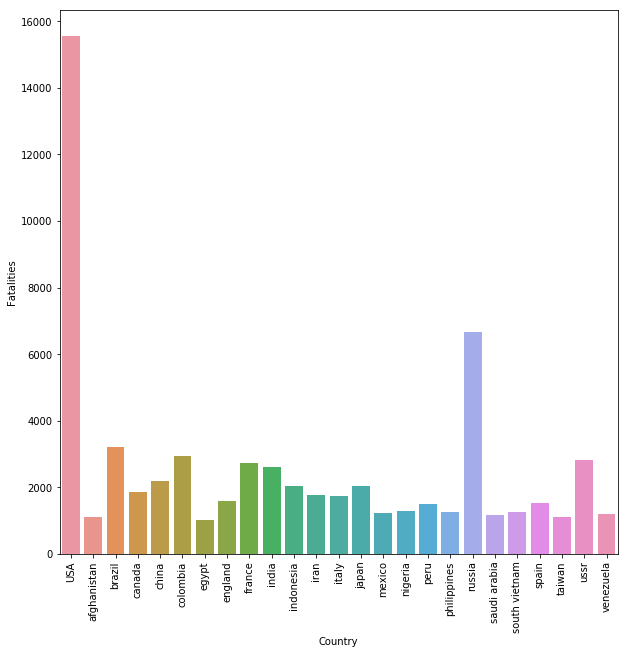

In [17]:
plt.figure(figsize = (10,10))
p = sns.barplot(x = 'Country', y = 'Fatalities', data = most_fatal_countries)
_ = p.set_xticklabels(labels = most_fatal_countries['Country'], rotation=90)

-------------------------------------------------------------------------------------------------------------------